In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import joblib
import os
from sklearn.model_selection import train_test_split


In [3]:
# Cell 2: Load dataset
df = pd.read_csv("../data/housing.csv", delim_whitespace=True)

# Rename columns (if not already renamed in the CSV)
df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]


C:\Users\Balaji Sai\AppData\Local\Temp\ipykernel_21612\3412970365.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("../data/housing.csv", delim_whitespace=True)


In [4]:
# Cell 3: Load preprocessor and model
preprocessor = joblib.load("../models/preprocessor.joblib")
model = joblib.load("../models/best_model.joblib")  # or .pkl if preferred


In [5]:
# Cell 4: Preprocess data
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

X_transformed = preprocessor.transform(X)


In [6]:
# Cell 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)


In [7]:
# Cell 6: Predictions
y_pred = model.predict(X_test)


C:\Users\Balaji Sai\AppData\Local\Temp\ipykernel_21612\180468569.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("../images/actual_vs_predicted.png", bbox_inches='tight')
c:\Users\Balaji Sai\Downloads\house_price_prediction\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


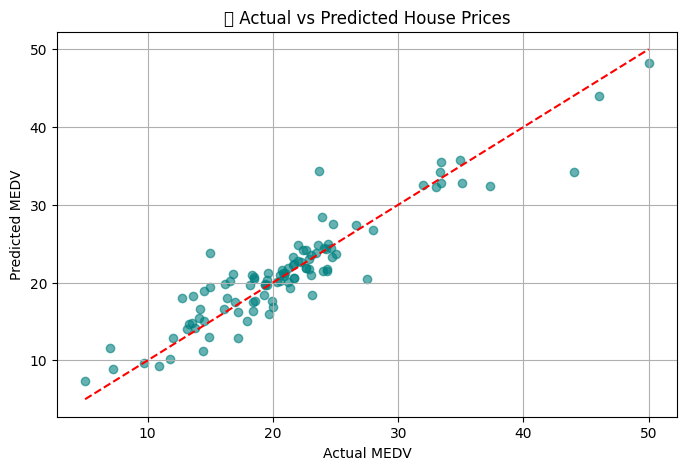

In [8]:
# Cell 7: Plot - Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("📊 Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.grid(True)

# Save plot
os.makedirs("../images", exist_ok=True)
plt.savefig("../images/actual_vs_predicted.png", bbox_inches='tight')
plt.show()


C:\Users\Balaji Sai\AppData\Local\Temp\ipykernel_21612\1787776403.py:10: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("../images/residuals.png", bbox_inches='tight')
c:\Users\Balaji Sai\Downloads\house_price_prediction\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


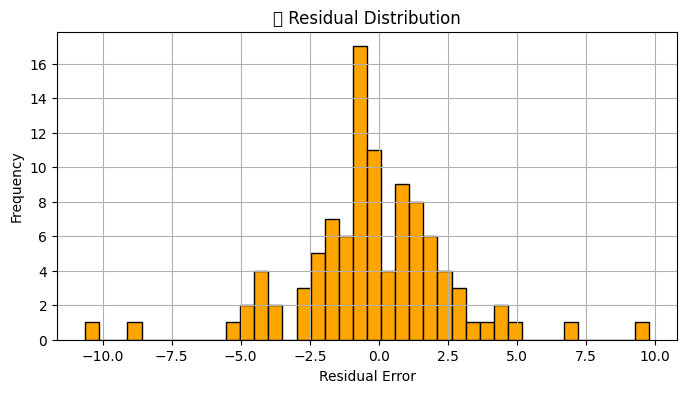

In [9]:
# Cell 8: Plot - Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=40, color='orange', edgecolor='black')
plt.title("📉 Residual Distribution")
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.grid(True)

plt.savefig("../images/residuals.png", bbox_inches='tight')
plt.show()
